In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Reading the CSV files

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Understanding the data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='SibSp'>

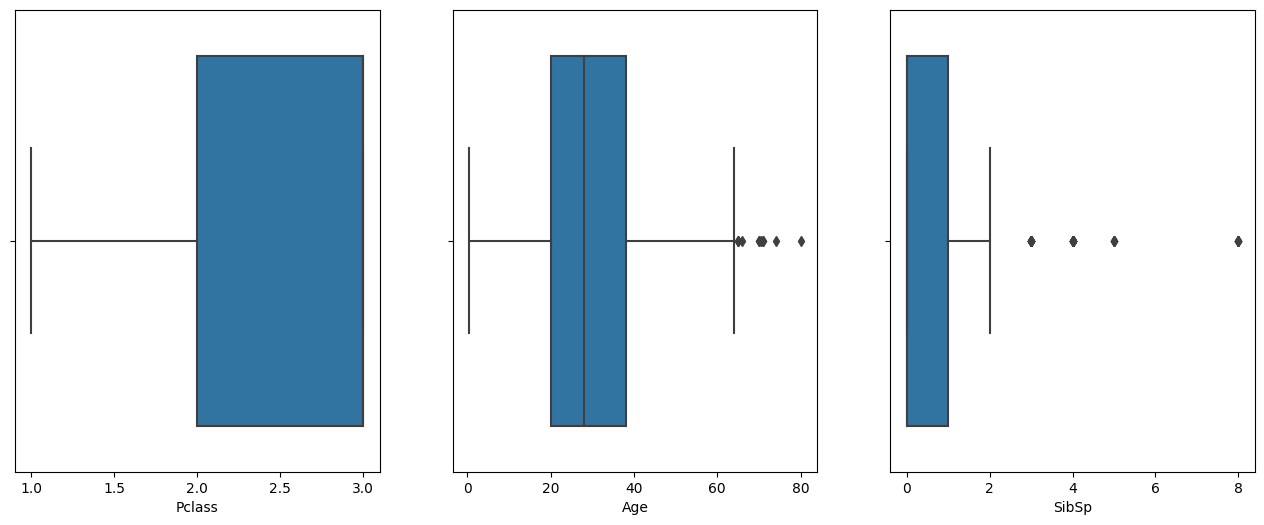

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.boxplot(data=train_data, x='Pclass', ax=axs[0])
sns.boxplot(data=train_data, x='Age', ax=axs[1])
sns.boxplot(data=train_data, x='SibSp', ax=axs[2])

<Axes: xlabel='Fare'>

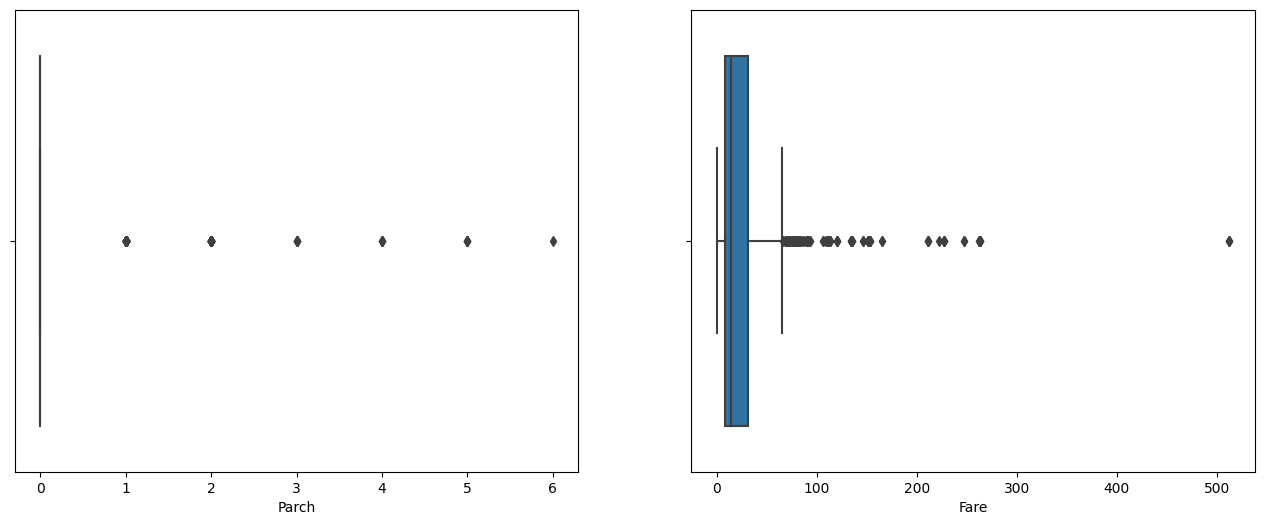

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=train_data, x='Parch', ax=axs[0])
sns.boxplot(data=train_data, x='Fare', ax=axs[1])

# Feature Engineering

In [11]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Handling missing values

In [12]:
test_passenger_id = test_data['PassengerId']
train_data = train_data.drop(['Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId', 'SibSp'], axis=1)
test_data = test_data.drop(['Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId', 'SibSp'], axis=1)

In [13]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [14]:
train_data.shape

(891, 7)

In [15]:
test_data.shape

(418, 6)

In [16]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [17]:
train_age_median = train_data['Age'].median()

In [18]:
values = {'Age': train_age_median}
train_data = train_data.fillna(value=values)

In [19]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
FamilySize    0
dtype: int64

In [20]:
test_data.isnull().sum()

Pclass         0
Sex            0
Age           86
Fare           1
Embarked       0
FamilySize     0
dtype: int64

<Axes: xlabel='Fare'>

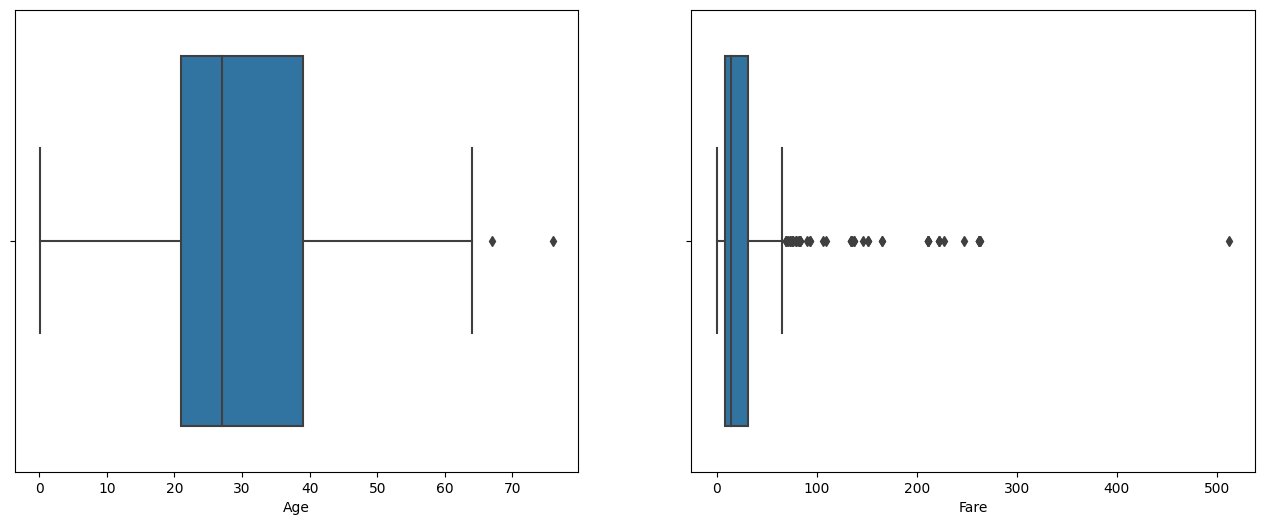

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=test_data, x='Age', ax=axs[0])
sns.boxplot(data=test_data, x='Fare', ax=axs[1])

In [22]:
test_age_median = test_data['Age'].median()
test_fare_median = test_data['Fare'].median()
values = {'Age': test_age_median, 'Fare': test_fare_median}

In [23]:
test_data = test_data.fillna(value=values)

In [24]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

# Handling outliers

<Axes: xlabel='FamilySize'>

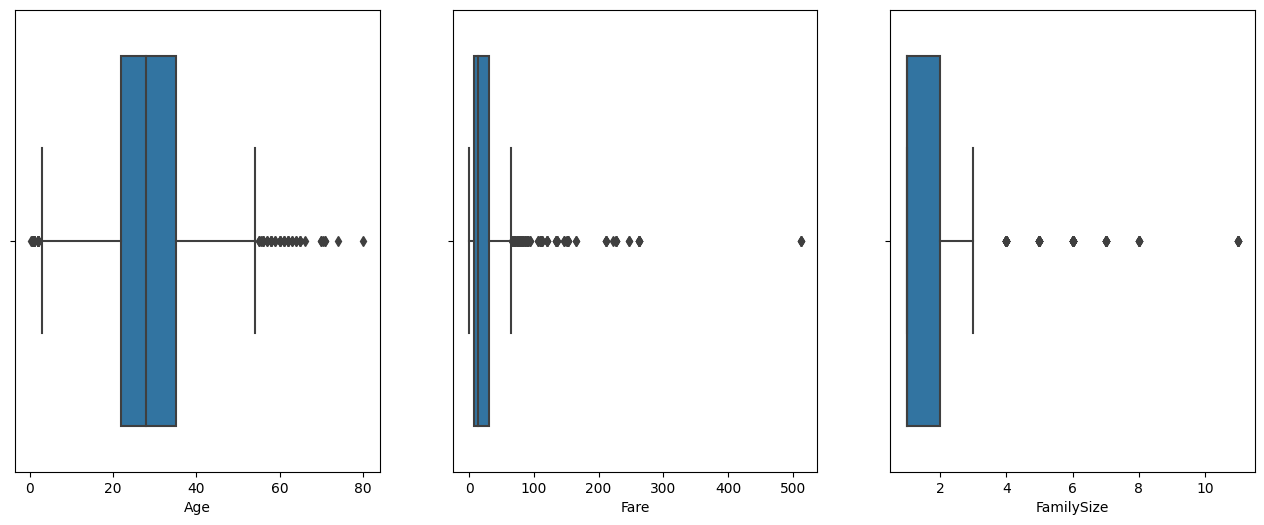

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.boxplot(data=train_data, x='Age', ax=axs[0])
sns.boxplot(data=train_data, x='Fare', ax=axs[1])
sns.boxplot(data=train_data, x='FamilySize', ax=axs[2])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FamilySize', ylabel='Count'>

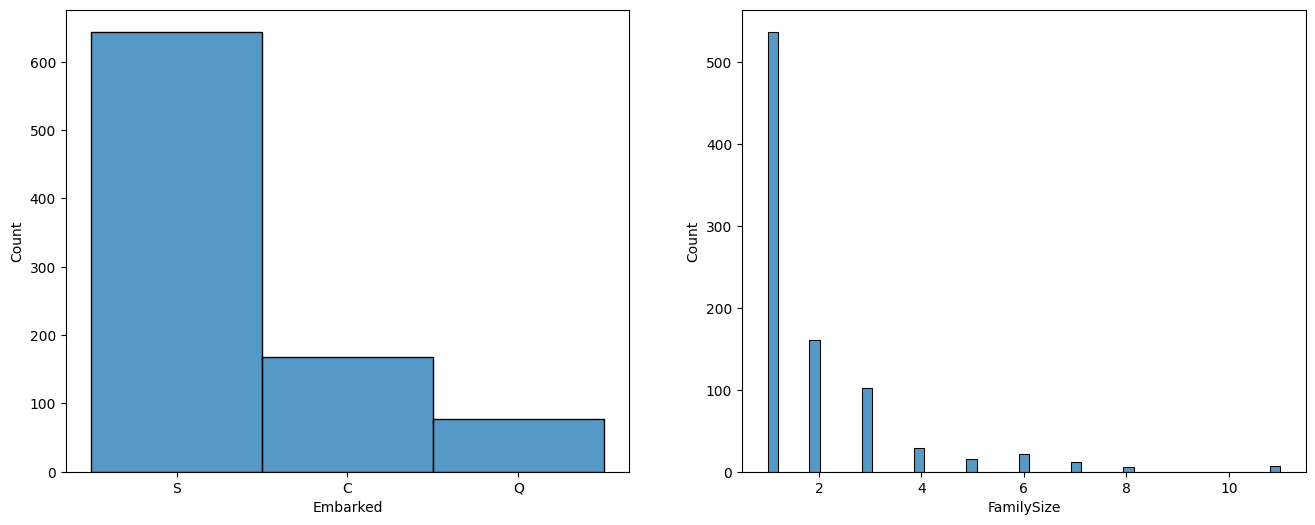

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=train_data, x='Embarked', ax=axs[0])
sns.histplot(data=train_data, x='FamilySize', ax=axs[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

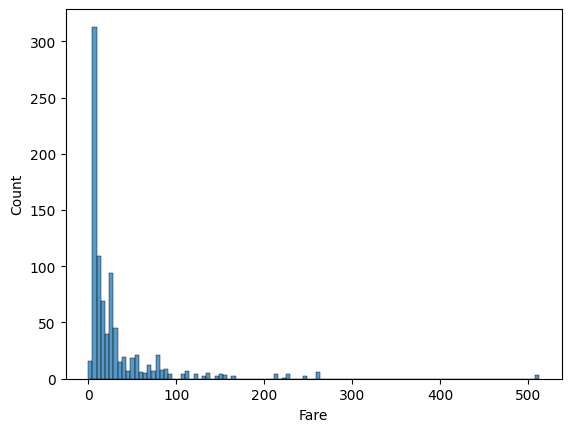

In [27]:
sns.histplot(data=train_data, x='Fare')

In [28]:
outliers_to_drop = train_data[(train_data['Age'] > 60) | (train_data['FamilySize'] > 5) | (train_data['Fare'] > 75)].index
outliers_to_drop

Index([ 13,  16,  25,  27,  31,  33,  34,  50,  52,  54,
       ...
       829, 835, 846, 849, 850, 851, 856, 863, 879, 885],
      dtype='int64', length=159)

In [29]:
train_data = train_data.drop(outliers_to_drop, axis=0)

In [30]:
train_data.shape

(732, 7)

<Axes: xlabel='Fare'>

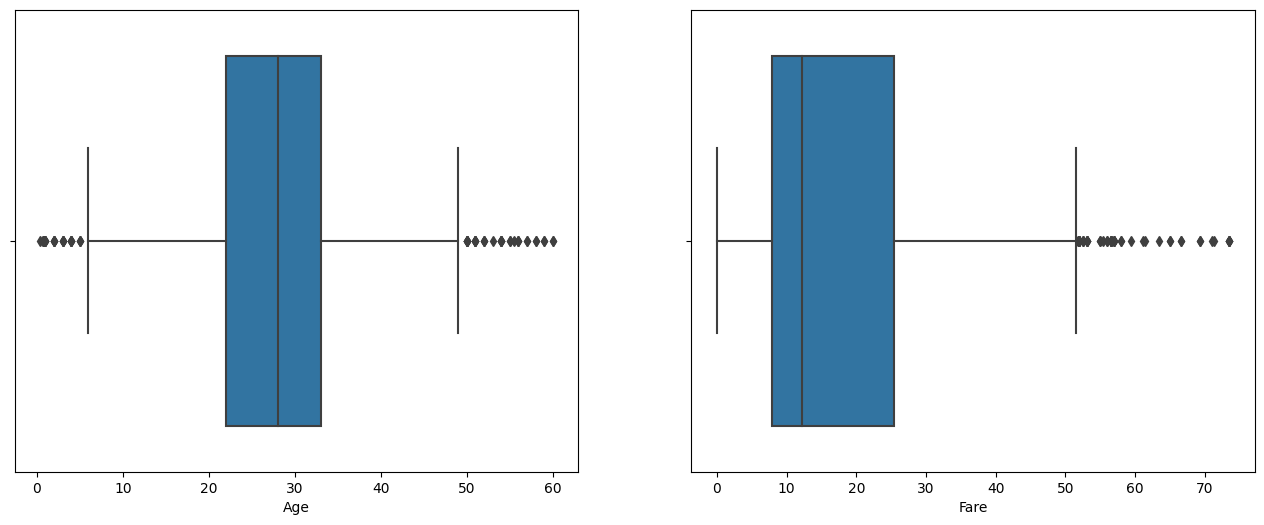

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=train_data, x='Age', ax=axs[0])
sns.boxplot(data=train_data, x='Fare', ax=axs[1])

In [32]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,4
889,1,1,male,26.0,30.0000,C,1


In [33]:
train_data = train_data.reset_index(drop=True)

# Splitting X and y

In [34]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived'], axis=1)

In [35]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
727    0
728    1
729    0
730    1
731    0
Name: Survived, Length: 732, dtype: int64

In [36]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...
727,2,male,27.0,13.0000,S,1
728,1,female,19.0,30.0000,S,1
729,3,female,28.0,23.4500,S,4
730,1,male,26.0,30.0000,C,1


In [37]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'], dtype='object')

# Turning catogericals to numerical

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(drop="first", sparse_output=False)

In [40]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1


In [41]:
catogerical_cols = ['Sex', 'Embarked', 'Pclass']

In [42]:
encoded_features = encoder.fit_transform(X_train[catogerical_cols])

In [43]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(catogerical_cols))
X_train_enc = pd.concat([X_train, encoded_df], axis=1)

In [44]:
X_train_enc.drop(catogerical_cols, axis=1, inplace=True)

In [45]:
X_train_enc.head()

,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,7.2500,2,1.0,0.0,1.0,0.0,1.0
1,38.0,71.2833,2,0.0,0.0,0.0,0.0,0.0
2,26.0,7.9250,1,0.0,0.0,1.0,0.0,1.0
3,35.0,53.1000,2,0.0,0.0,1.0,0.0,0.0
4,35.0,8.0500,1,1.0,0.0,1.0,0.0,1.0


In [46]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,2
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,3


In [47]:
encoded_features_test = encoder.transform(test_data[catogerical_cols])

In [48]:
encoded_test = pd.DataFrame(encoded_features_test,
                            columns=encoder.get_feature_names_out(catogerical_cols))
test_data_enc = pd.concat([test_data, encoded_test], axis=1)

In [49]:
test_data_enc.drop(catogerical_cols, axis=1, inplace=True)

In [50]:
test_data_enc.head()

,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,7.8292,1,1.0,1.0,0.0,0.0,1.0
1,47.0,7.0000,2,0.0,0.0,1.0,0.0,1.0
2,62.0,9.6875,1,1.0,1.0,0.0,1.0,0.0
3,27.0,8.6625,1,1.0,0.0,1.0,0.0,1.0
4,22.0,12.2875,3,0.0,0.0,1.0,0.0,1.0


In [51]:
test_data_enc.shape

(418, 8)

In [52]:
cols = X_train_enc.columns

# Feature Scaling

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
robust_scaler = RobustScaler()

In [55]:
X_train_scaled = robust_scaler.fit_transform(X_train_enc)

In [56]:
X_train = pd.DataFrame(X_train_scaled, columns=cols)

In [57]:
X_train.head()

,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-0.545455,-0.286340,1.0,0.0,0.0,0.0,0.0,0.0
1,0.909091,3.357941,1.0,-1.0,0.0,-1.0,0.0,-1.0
2,-0.181818,-0.247924,0.0,-1.0,0.0,0.0,0.0,0.0
3,0.636364,2.323088,1.0,-1.0,0.0,0.0,0.0,-1.0
4,0.636364,-0.240810,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
test_data_scaled = robust_scaler.transform(test_data_enc)

In [59]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [60]:
test_data_scaled

array([[ 0.59090909, -0.25337632,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 1.72727273, -0.30056798,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.09090909, -0.14761623,  0.        , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [ 0.95454545, -0.28633991,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.09090909, -0.24081009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.09090909,  0.5735079 ,  2.        , ..., -1.        ,
         0.        ,  0.        ]])

In [61]:
test_data = pd.DataFrame(test_data_scaled, columns=cols)

In [62]:
test_data.isnull().sum()

Age           0
Fare          0
FamilySize    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [63]:
test_data = test_data.dropna(axis=0)

In [64]:
test_data.shape

(418, 8)

In [65]:
test_data.isnull().sum()

Age           0
Fare          0
FamilySize    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [66]:
test_data.head()

,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.590909,-0.253376,0.0,0.0,1.0,-1.0,0.0,0.0
1,1.727273,-0.300568,1.0,-1.0,0.0,0.0,0.0,0.0
2,3.090909,-0.147616,0.0,0.0,1.0,-1.0,1.0,-1.0
3,-0.090909,-0.205951,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.545455,0.000356,2.0,-1.0,0.0,0.0,0.0,0.0


In [67]:
test_data.isnull().sum()

Age           0
Fare          0
FamilySize    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logistic_regr = LogisticRegression(random_state=42)

In [70]:
logistic_regr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [71]:
prediction = logistic_regr.predict(test_data)

In [72]:
values = {'PassengerId' : test_passenger_id, 'Survived' : prediction}
output = pd.DataFrame(values)

In [73]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
output.to_csv("submission.csv", index=False)

# Check if overfit

In [75]:
pred_train = logistic_regr.predict(X_train)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy = accuracy_score(y_train, pred_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7855191256830601
